<h1 style="text-align:center;font-size:30px;" > Reducing Commercial Aviation Fatalities
    

#### SOURCE: https://www.kaggle.com/c/reducing-commercial-aviation-fatalities/

### Problem Intution:

Most flight-related fatalities stem from a loss of “airplane state awareness.” That is, ineffective attention management on the part of pilots who may be distracted, sleepy or in other dangerous cognitive states.

our challenge is to build a model to detect troubling events from aircrew’s physiological data. we'll use data acquired from actual pilots in test situations, and our models should be able to run calculations in real time to monitor the cognitive states of pilots. With our help, pilots could then be alerted when they enter a troubling state, preventing accidents and saving lives.

Reducing aircraft fatalities is just one of the complex problems that Booz Allen Hamilton has been solving for business, government, and military leaders for over 100 years. Through devotion, candor, courage, and character, they produce original solutions where there are no roadmaps. Now we can help them find answers, save lives, and change the world.

### Data Description:

In this dataset, we are provided with real physiological data from eighteen pilots who were subjected to various distracting events. The benchmark training set is comprised of a set of controlled experiments collected in a non-flight environment, outside of a flight simulator. The test set (abbreviated LOFT = Line Oriented Flight Training) consists of a full flight (take off, flight, and landing) in a flight simulator.

The pilots experienced distractions intended to induce one of the following three cognitive states:
- CA
- DA
- SS

For each experiment, a pair of pilots (each with its own crew id) was recorded over time and subjected to the CA, DA, or SS cognitive states. The training set contains three experiments (one for each state) in which the pilots experienced just one of the states. For example, in the experiment = CA, the pilots were either in a baseline state (no event) or the CA state. The test set contains a full flight simulation during which the pilots could experience any of the states (but never more than one at a time). The goal of this competition is to predict the probability of each state for each time in the test set.

Each sensor operated at a sample rate of 256 Hz. Please note that since this is physiological data from real people, there will be noise and artifacts in the data.

#### Data Feilds:
1.'crew'-a unique id for a pair of pilots. There are 9 crews in the data.<br>
2.'experiment'-One of CA, DA, SS or LOFT. The first 3 comprise the training set. The latter the test set.<br>
3.'time'-seconds into the experiment<br> 
4.'eeg_fp1'<br>
5.'eeg_f7'<br>
6.'eeg_f8'<br>
7.'eeg_t4'<br> 
8.'eeg_t6'<br> 
9.'eeg_t5'<br> 
10.'eeg_t3'<br> 
11.'eeg_fp2'<br> 
12.'eeg_o1'<br> 
13.'eeg_p3'<br>
14.'eeg_pz'<br> 
15.'eeg_f3'<br> 
16.'eeg_fz'<br>
17.'eeg_f4'<br>
18.'eeg_c4' <br>
19.'eeg_p4' <br>
20.'eeg_poz'<br>
21.'eeg_c3' <br>
22.'eeg_cz' <br>
23.'eeg_o2' <br>
24.'ecg'-3-point Electrocardiogram signal. The sensor had a resolution/bit of .012215 µV and a range of -100mV to +100mV. The data are provided in microvolts. <br>
25.'r'- Respiration, a measure of the rise and fall of the chest. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts. <br>
26.'gsr'- Galvanic Skin Response, a measure of electrodermal activity. The sensor had a resolution/bit of .2384186 µV and a range of -2.0V to +2.0V. The data are provided in microvolts.<br>
27.'seat'-is the pilot in the left (0) or right (1) seat<br> 
28.'event'-The state of the pilot at the given time: A = baseline, B = SS, C = CA, D = DA<br>

#### Evaluation metric:
- Multi-Class Log Loss

#### sample datapoint:

	crew	experiment	time	seat	eeg_fp1	eeg_f7	eeg_f8	eeg_t4	eeg_t6	eeg_t5	...	eeg_c4	eeg_p4	eeg_poz	eeg_c3	0	1	CA	0.011719	1	-5.28545	26.775801	-9.52731	-12.7932	16.7178	33.737499	...	37.368999	17.437599	19.2019	20.5968	-3.95115	14.5076	-4520.0	817.705994	388.829987	A

#### More Details about the features

##### eeg feature: 
Electroencephalogram (EEG) : EEG's role has been greatly overstated over the years, and it's definitely not a panacea of brain activity. Clinically, you can usefully tell if someone is awake, asleep, brain dead, having a seizure, and a handful of other things. EEG is a summation of all the electrical activity on the surface of the brain. 

##### ecg feature
Electrocardiogram (ECG) : This measures the electrical activity in the heart. This is a single lead ECG, useful for analysing the rhythm and rate. What's interesting about the ECG is while it's shape might vary between individuals or recordings (changes in lead position for instance), beat to beat, it's shape doesn't change much at all. The shape of the ECG can 'squash' down slightly as heart rate increases, but the amplitude is fixed, and really the only useful information for this experiment is the heart rate (which intuitively might be valuable as it increases when you're stressed). 

##### r
Respiration : This is a simple measure of the rise and fall of the chest. It represents muscle activity of the diapragm and abdomen. We know that when someone is physiologically stressed, this rate increases. Could be interesting.

##### experiment
- Channelized Attention (CA) is, roughly speaking, the state of being focused on one task to the exclusion of all others. This     is induced in benchmarking by having the subjects play an engaging puzzle-based video game.
- Diverted Attention (DA) is the state of having one’s attention diverted by actions or thought processes associated with a       decision. This is induced by having the subjects perform a display monitoring task. Periodically, a math problem showed up       which had to be solved before returning to the monitoring task.
- Startle/Surprise (SS) is induced by having the subjects with jump scares.

- LOFT - Line Oriented Flight Training

## Exploratory Data Analysis

Loading all required Packages

In [2]:
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
data= pd.read_csv('train.csv')

In [4]:
print(data.columns)
print('----'*30)
print('\n')
print("The number of datapoints are")
print(data.shape[0])
print('\n')
print('----'*30)
print(data.head())

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------


The number of datapoints are
4867421


------------------------------------------------------------------------------------------------------------------------
   crew experiment      time  seat   eeg_fp1     eeg_f7     eeg_f8     eeg_t4  \
0     1         CA  0.011719     1  -5.28545  26.775801  -9.527310 -12.793200   
1     1         CA  0.015625     1  -2.42842  28.430901  -9.323510  -3.757230   
2     1         CA  0.019531     1  10.67150  30.420200  15.350700  24.724001   
3     1         CA  0.023438     1  11.45250  25.609800   2.433080  12.41

In [14]:
data.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

#### Observation
- there are 4,867,421 Datapoints
- except the experiment Feature other features are are numeric features 
- I cannot lower the datatype-bit size because there are signal extracted features and lowering them might effect the data.
- there are no null values

## Univariate analysis

### Class Attribute

A closer look on the class distribution over the data 

In [4]:
data['event'].value_counts()

A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64

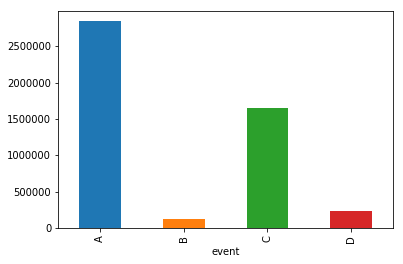

In [13]:
data.groupby("event")['crew'].count().plot.bar()

#### Observation:
- In the above plot it is clear that the class A is coming up more times than other classes
- that means that the pilot is mostly not disturbed which is a good sign in reality

### Experiment Attribute

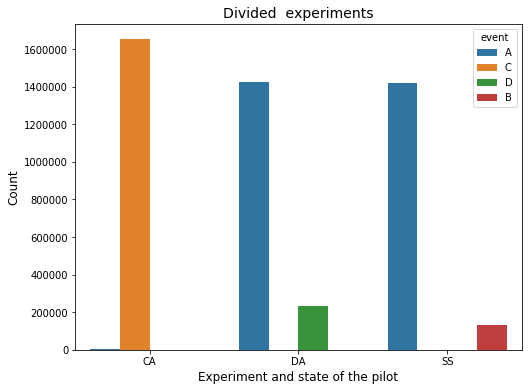

In [29]:
plt.figure(figsize=(8,6))
sns.countplot('experiment', hue='event', data=data)
plt.xlabel("Experiment and state of the pilot", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Divided  experiments", fontsize=14)
plt.show()

#### Observation:
- the above plot shows the distribution of the class attribute across 3 different states in the experiment
- On clearly observing the plots we can tell that When there is a Channelized Attention Experiment the pilot doesnt seems to be in a Baseline State. i.e, he will not be focused because he is roughly speaking
- Coming to Diverted Attention Experiment the pilot is still in baseline and tends to lose his focus sometimes that might be due to he solves a math problem in between monitoring the flight.
- And the Suprise Experiment, he mostly at baseline because he is introduced to a suprise sometimes only but not through out the experiment

### Seat Attribute

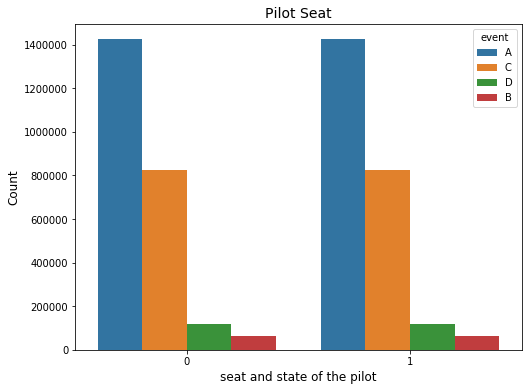

In [30]:
plt.figure(figsize=(8,6))
sns.countplot('seat', hue='event', data=data)
plt.xlabel("seat and state of the pilot", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Pilot Seat", fontsize=14)
plt.show()

#### Observation:
- Taking the seat attribute doesnt give us any insights because it is evenly distributed across the 2-seats

### Time Attribute

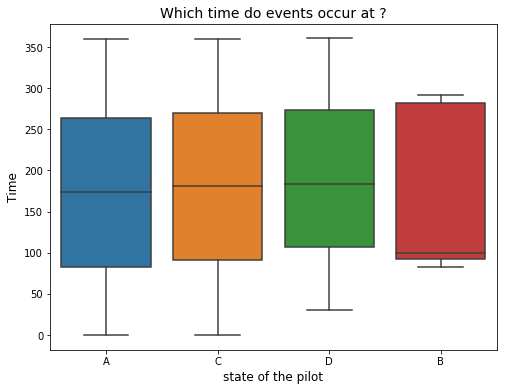

In [10]:
plt.figure(figsize=(8,6))
sns.violinplot(x='event',y='time',data=data)
plt.xlabel("state of the pilot", fontsize=12)
plt.ylabel("Time",fontsize=12)
plt.title("Which time do events occur at ?", fontsize=14)
plt.show()

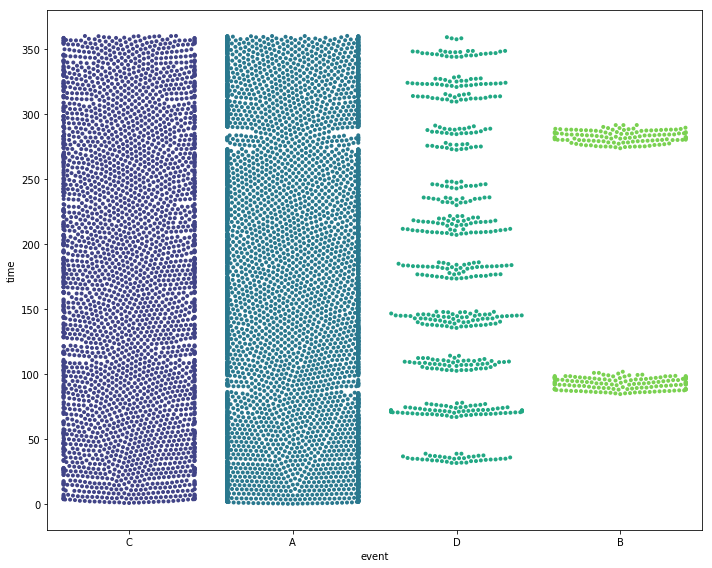

In [4]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='event',y='time',data=data.sample(10000),palette='viridis',size=4)
plt.tight_layout()

#### Observation:
- Time proves to be one of the key feature in many cases but here it we cannot differentiate the classes much. If there was any sort of data during the flight take-off and landing we would have got much better results


### Crew

In [3]:
crew=data['crew']

In [6]:
print(crew.unique())

[ 1  2  3  4  5  6  7  8 13]


6     552958
4     552881
2     552868
5     552815
3     552795
7     552769
13    552724
8     549959
1     447652
Name: crew, dtype: int64


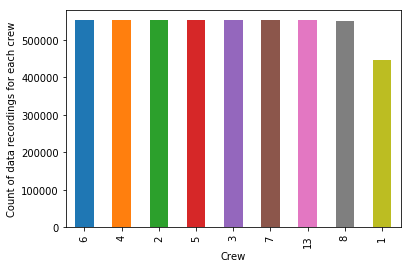

In [4]:
crew.value_counts().plot.bar()
plt.xlabel("Crew")
plt.ylabel("Count of data recordings for each crew")
print(crew.value_counts())

#### Observation:
- there are about 9 crews i.e, there are 9 pilots on whom the experiments in the simulator are recorded

### GSR Feature

In [75]:
# through some useful information from https://en.wikipedia.org/wiki/Electrodermal_activity
# it is reading of the epidermal tissue i.e, of the skin
# if the pilot is under some sort of pressure then he may have  alot of moisture on his skin due to tension
# if the pilot is not under any stress while doing task or is at ease his skin will be in a relaxed position(no-resistance)
# where there will not be much contraction of the skin

In [12]:
gsr=data['gsr']

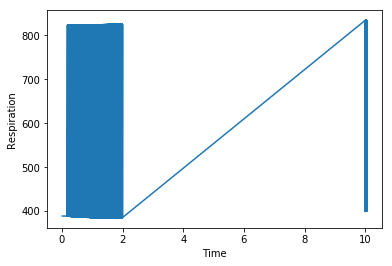

In [6]:
plt.plot(data['time'].iloc[:1000],gsr.iloc[:1000])
plt.xlabel("Time")
plt.ylabel("Respiration")
plt.show()

#### Observation:
- the above plot shows that between the interval of 2-10 the readings are a bit stable and increasing uniformly that means the pilot is not under stress between that region.

### Respiration feature

In [83]:
#This is a simple measure of the rise and fall of the chest. It represents muscle activity of the diapragm and abdomen.
#We know that when someone is under stress and this rate increases.

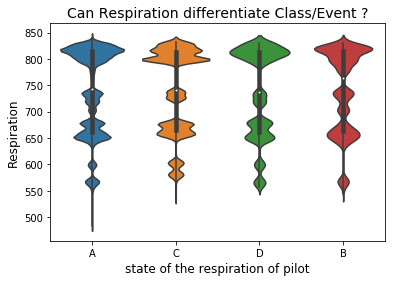

In [14]:
sns.violinplot(x='event',y='r',data=data)
plt.xlabel("state of the respiration of pilot", fontsize=12)
plt.ylabel("Respiration",fontsize=12)
plt.title("Can Respiration differentiate Class/Event ?", fontsize=14)
plt.show()

#### Observation:
- so the respiration cannot separate the events that might be due to some noise data or we need some more information about it.

### Electroencephalogram feature(EEG)

In [14]:
# Reference link : https://www.youtube.com/watch?v=17uKMFfTupY
# Refernce link for EEG test: https://www.youtube.com/watch?v=oPhIpZToShw
# https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG)

#### NOTE:
- These EEG Features are obtained by the domain Experts. They performed feature extraction through matlab and found out various features from the EEG Signal

In [7]:
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz"
                , "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]


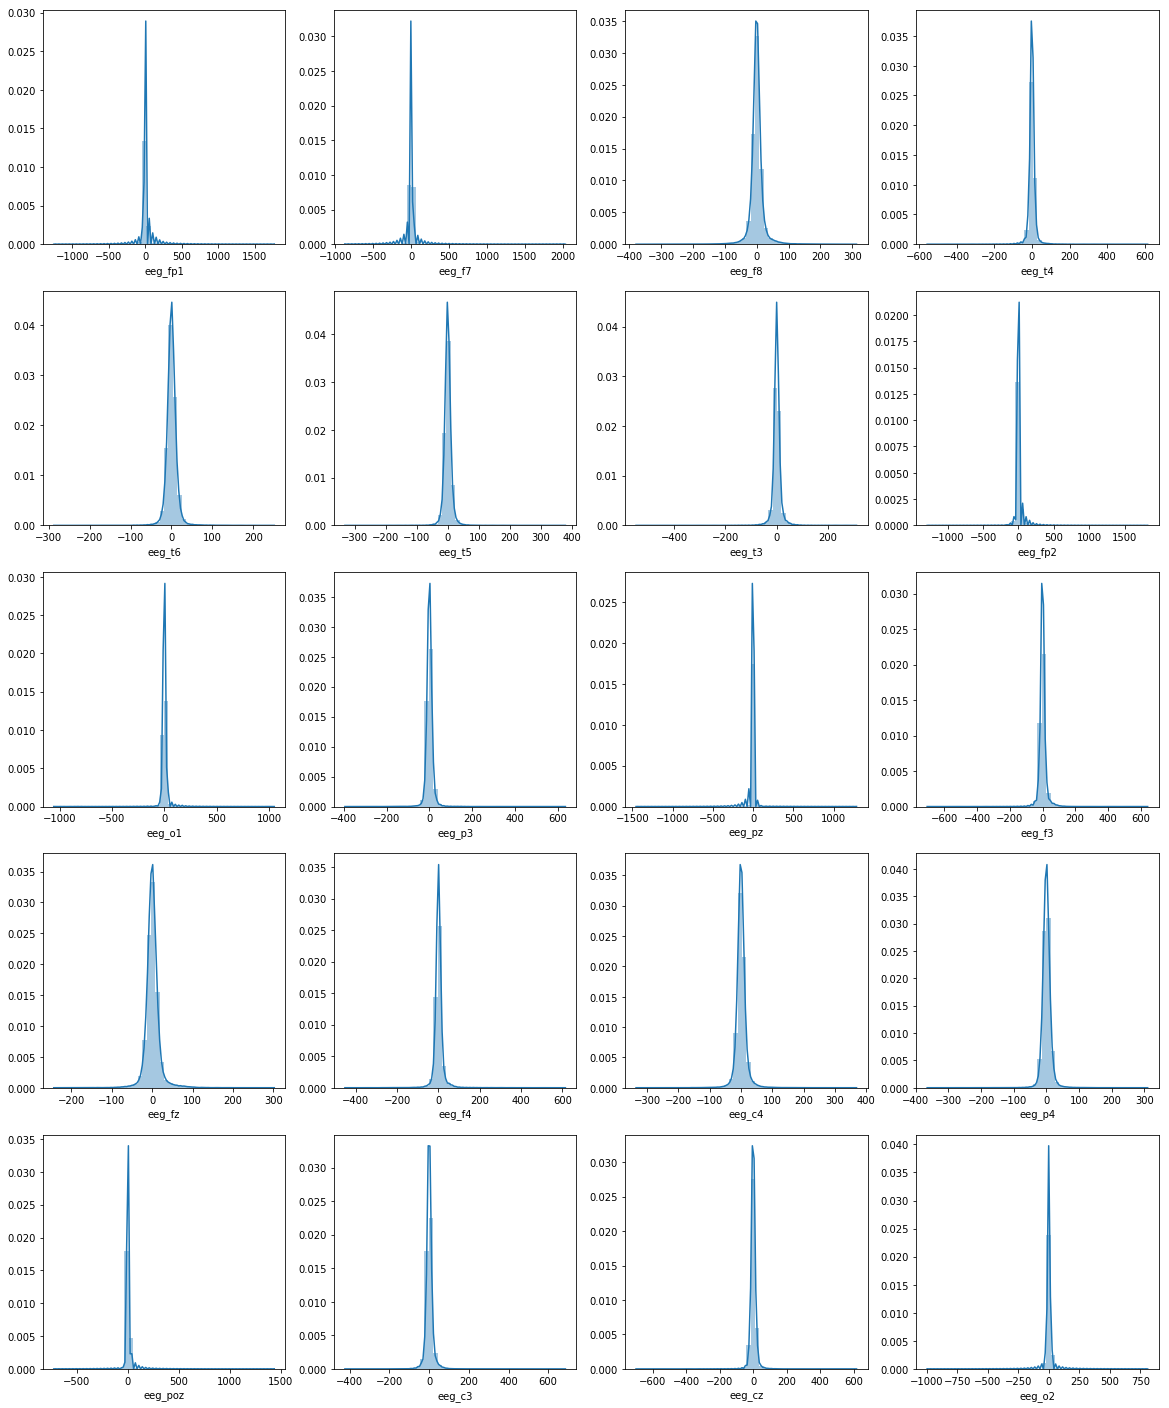

In [46]:

plt.figure(figsize=(20,25))
i = 0
plt.xlabel("Electro Signal (µV)", fontsize=12)
plt.title("Electroencephalogram Signal Distribution", fontsize=15)

for eeg in eeg_features:
    i += 1
    plt.subplot(5, 4, i)
    sns.distplot(c4[eeg], label='eeg_feature')

plt.show()

#### Observation:
- these features are extracted/engineered features from eeg signals.
- these might prove to be very useful in the prediction.

### ECG Feature

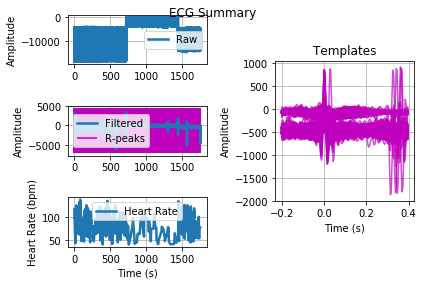

In [3]:
#refered from : https://pypi.org/project/biosppy/
pilot1=data[data['crew']==1]
from biosppy.signals import ecg

out = ecg.ecg(signal=pilot1['ecg'], sampling_rate=256, show=True)

Text(0.5,0,'Time')

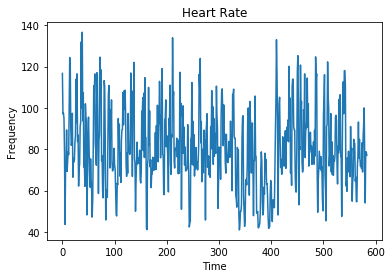

In [4]:
plt.title("Heart Rate")
plt.plot(out['heart_rate'])
plt.ylabel("Frequency")
plt.xlabel("Time")

With Frequency-128hz

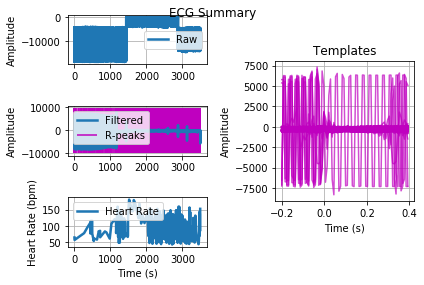

Text(0.5,0,'Time')

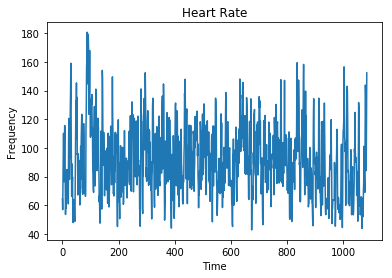

In [7]:
out = ecg.ecg(signal=pilot1['ecg'], sampling_rate=128, show=True)
plt.title("Heart Rate")
plt.plot(out['heart_rate'])
plt.ylabel("Frequency")
plt.xlabel("Time")

#### Observation:
- we cannot further zoom-in for the frequencies because the sampling rate can go upto Frequency/2 vaalue i.e; 128 in our case
- from the ECG we can tell the behavior of the pilot based on his heart-beat. In the about plot at one instance the beat touches 180 that means he is not okay and must be stressed out in the task

- here sampling rate refers to the frequency that we take and plot the signal 
  so it means that we take about  instances per unit of time

## Bivariate analysis

### Considering each class

#### lets take the events separately and then try to find out some differences between them

In [3]:
class_a=data.loc[data['event']=='A']
class_b=data.loc[data['event']=='B']
class_c=data.loc[data['event']=='C']
class_d=data.loc[data['event']=='D']
print("The number of datapoints classified:")
print("as 'A'",class_a.shape[0])
print("as 'B'",class_b.shape[0])
print("as 'C'",class_c.shape[0])
print("as 'D'",class_d.shape[0])

The number of datapoints classified:
as 'A' 2848809
as 'B' 130597
as 'C' 1652686
as 'D' 235329


In [4]:
gsra=class_a['gsr']
gsrb=class_b['gsr']
gsrc=class_c['gsr']
gsrd=class_d['gsr']


#### GSR Plot for various plots

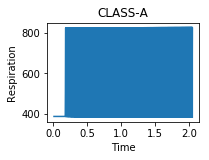

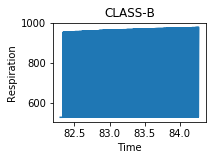

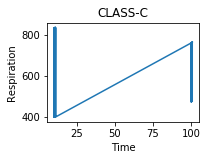

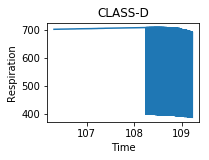

In [6]:

plt.subplot(2,2,1)
plt.title("CLASS-A")
plt.plot(class_a['time'].iloc[:1000],gsra.iloc[:1000])
plt.xlabel("Time")
plt.ylabel("Respiration")
plt.show()

plt.subplot(2,2,2)

plt.title("CLASS-B")
plt.plot(class_b['time'].iloc[:1000],gsrb.iloc[:1000])
plt.xlabel("Time")
plt.ylabel("Respiration")
plt.show()

plt.subplot(2,2,3)

plt.title("CLASS-C")
plt.plot(class_c['time'].iloc[:1000],gsrc.iloc[:1000])
plt.xlabel("Time")
plt.ylabel("Respiration")
plt.show()

plt.subplot(2,2,4)

plt.title("CLASS-D")
plt.plot(class_d['time'].iloc[:1000],gsrd.iloc[:1000])
plt.xlabel("Time")
plt.ylabel("Respiration")
plt.show()

#### Observation:
- This could be very useful feature given the time of that experiment done.
- from the above plots we see that in time the class(Events) effect the GSR Value.
- Consider Class A whose value GSR value ranges between 400-800
- similarly Class-b ranges from 600-1000
- Class-c 400-800 but we can differentiate between class a and c because Class C appears just at the front and end between intervals. It has a high value of 800 then gradually increases and then decreases.
- Coming to Class D it has a range of 400-700 and it comes only at the backend of the time interval(from 108th second in our plot)

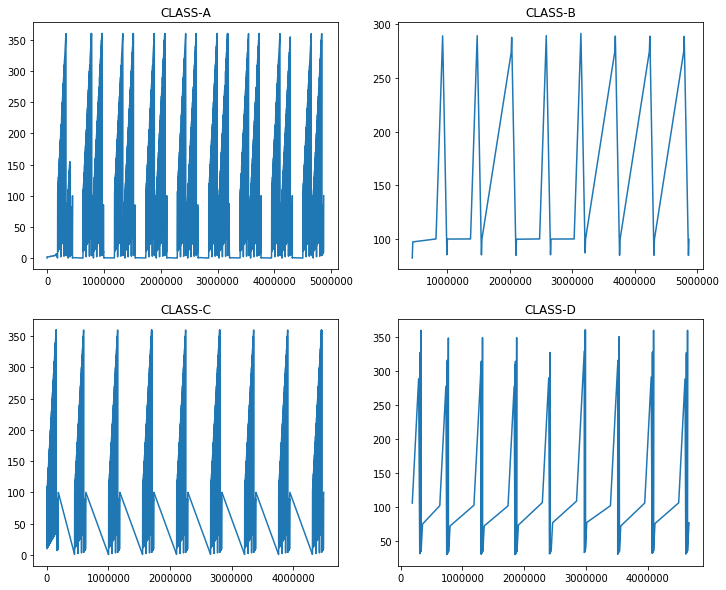

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("CLASS-A")
plt.plot(class_a['time'])

plt.subplot(2,2,2)
plt.title("CLASS-B")
plt.plot(class_b['time'])

plt.subplot(2,2,3)
plt.title("CLASS-C")
plt.plot(class_c['time'])

plt.subplot(2,2,4)
plt.title("CLASS-D")
plt.plot(class_d['time'])
plt.show()

- we got one useful point, It is that the events happen for a certain time and then shift as seen from above i.e,
  Event A Occurs the most time and then Class-C. Class- B occurs so less number of times.

**********Distribution of GSR  across all Events************


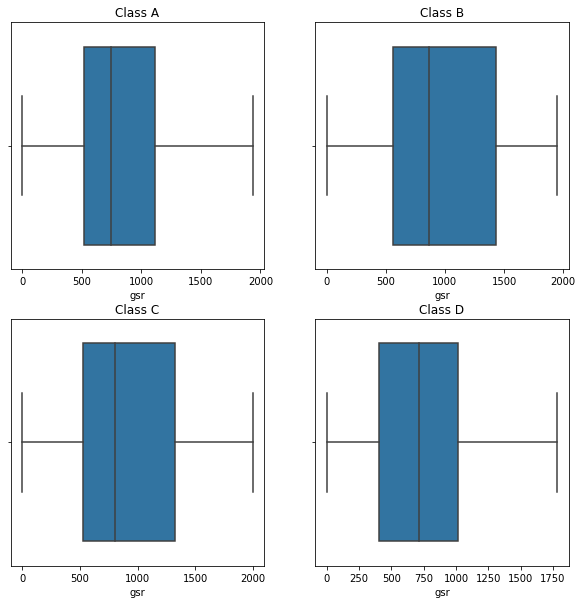

In [10]:
plt.figure(figsize=(10,10))
print("**********Distribution of GSR  across all Events************")
plt.subplot(2,2,1)
plt.title("Class A")
sns.boxplot(class_a['gsr'])

plt.subplot(2,2,2)
plt.title("Class B")
sns.boxplot(class_b['gsr'])

plt.subplot(2,2,3)
plt.title("Class C")
sns.boxplot(class_c['gsr'])

plt.subplot(2,2,4)
plt.title("Class D")
sns.boxplot(class_d['gsr'])
plt.show()

#### Observation:
- there is a lot less information from this feature we cannot separate them.

**********Distribution of GSR  across all Events************


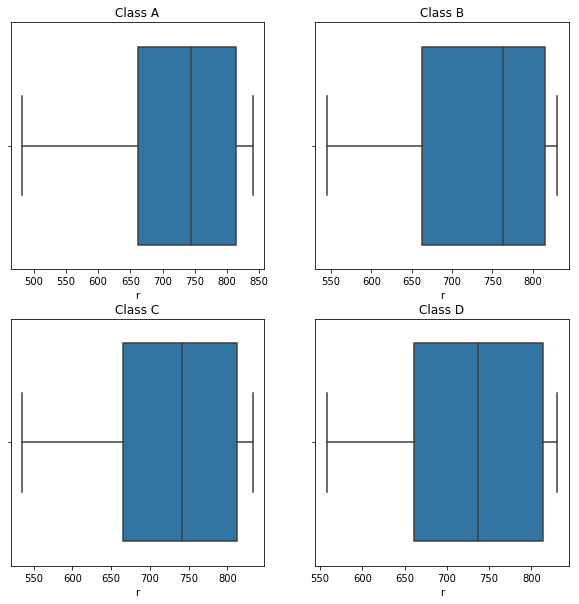

In [11]:
plt.figure(figsize=(10,10))
print("**********Distribution of Respiration  across all Events************")
plt.subplot(2,2,1)
plt.title("Class A")
sns.boxplot(class_a['r'])

plt.subplot(2,2,2)
plt.title("Class B")
sns.boxplot(class_b['r'])

plt.subplot(2,2,3)
plt.title("Class C")
sns.boxplot(class_c['r'])

plt.subplot(2,2,4)
plt.title("Class D")
sns.boxplot(class_d['r'])
plt.show()

#### Observation:
- there is absolutely nothing much informtion from these plot

### Considering each Crew 

In [24]:
#taking a single pilot as a sample

In [17]:
c4=data[data['crew']==4]

In [23]:
c4.iloc[:20]

,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,eeg_t5,...,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr,event
1553315,4,CA,0.007,0,24.619499,5.937970,15.834500,6.07105,8.393240,-5.62646,...,6.875490,8.698370,3.687540,4.292410,2.103410,10.807900,-553.086975,602.919983,885.312012,A
1553316,4,CA,0.015,0,26.618999,9.147760,11.644600,2.07881,-0.842557,1.23076,...,9.609730,9.884500,3.618800,10.537600,1.808090,8.406540,-553.086975,602.919983,885.312012,A
1553317,4,CA,0.023,0,34.282200,14.448900,19.124399,9.65571,2.963360,1.82850,...,14.120300,15.698200,4.737600,15.107900,4.716150,8.925020,-553.086975,602.919983,885.312012,A
1553318,4,CA,0.030,0,32.584400,13.162400,18.171600,13.54200,2.266580,-2.07052,...,9.876760,9.381940,-1.004400,11.602800,2.922490,7.569280,-553.086975,602.919983,885.312012,A
1553319,4,CA,0.038,0,29.755100,12.451000,18.260099,9.58385,1.905890,-2.07546,...,12.151000,5.504820,-1.965650,11.131100,2.765250,6.731220,-553.086975,602.919983,885.312012,A
1553320,4,CA,0.046,0,26.193100,7.540440,16.296801,11.77560,7.691890,10.67930,...,9.515260,10.321900,-2.841580,7.262360,-0.195338,7.196910,-553.086975,602.919983,885.312012,A
1553321,4,CA,0.053,0,24.108101,5.694460,18.701500,12.02720,6.345690,-2.01266,...,10.369400,7.678410,1.227880,4.574050,0.826678,5.694380,-553.086975,602.919983,885.312012,A
1553322,4,CA,0.061,0,19.795000,3.694360,11.968100,-2.54305,1.506820,-3.59506,...,2.925430,3.039590,3.679430,2.805940,-0.579659,6.799420,-553.086975,602.919983,885.312012,A
1553323,4,CA,0.066,1,2.131720,7.231340,6.175290,-1.77723,19.356701,-4.50519,...,17.301800,12.975100,19.637699,19.751200,36.177898,10.183700,6546.490234,826.765015,572.812988,A
1553324,4,CA,0.069,0,16.671301,0.225665,10.068700,4.98139,3.744110,-4.62032,...,4.609520,8.129460,0.727046,2.392330,-1.203700,3.471390,-553.086975,602.919983,885.312012,A


In [25]:
c4['event'].value_counts()

A    328532
C    184088
D     24897
B     15364
Name: event, dtype: int64

#### Observation:
- upon considering this pilot we see that the data is not updated at a uniform time interval as we see that for the first 8 points it is updated for every 0.008 seconds and then it comes down to 0.03.

### Pair Plots


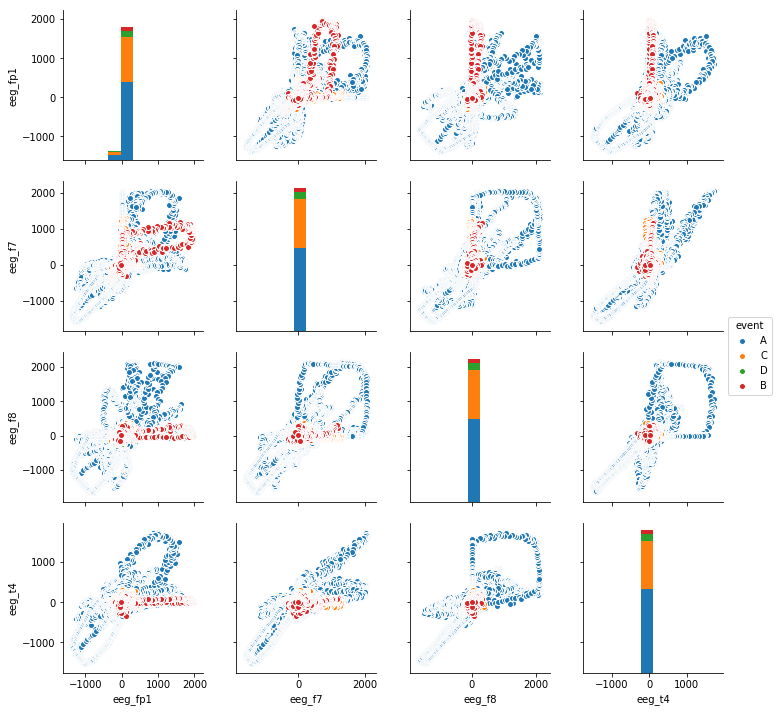

In [ ]:
d=data[["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4","event"]]
sns.pairplot(d,hue='event')

#### Observation:
- here we have used only a few set of features of EEG, we can differentiate them. We got the Class A and Class B separable features from the above plot.

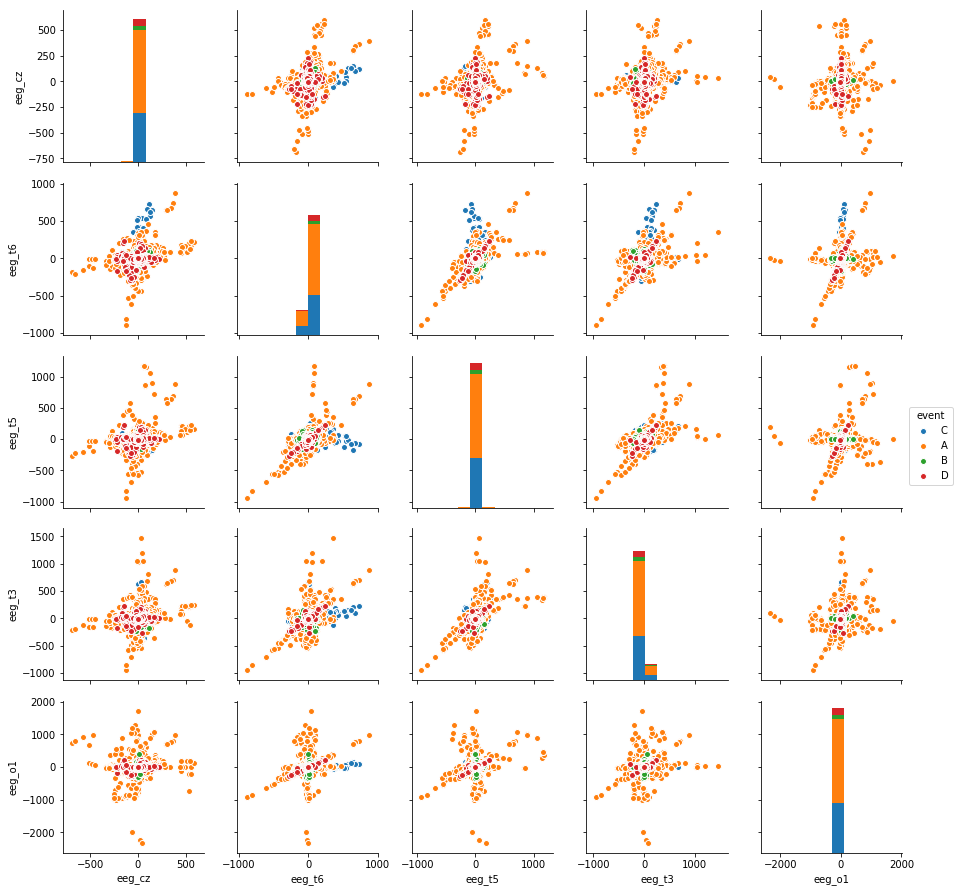

In [4]:
d=data[["eeg_cz","eeg_t6", "eeg_t5", "eeg_t3", "eeg_o1","event"]].sample(150000,random_state=29)
sns.pairplot(d,hue='event')

#### Observation:
- So the eeg features are proving to be a key for separation of the data.
- in the previous plot we saw how Class A and B are separated and now the above plot also helps to separate them.

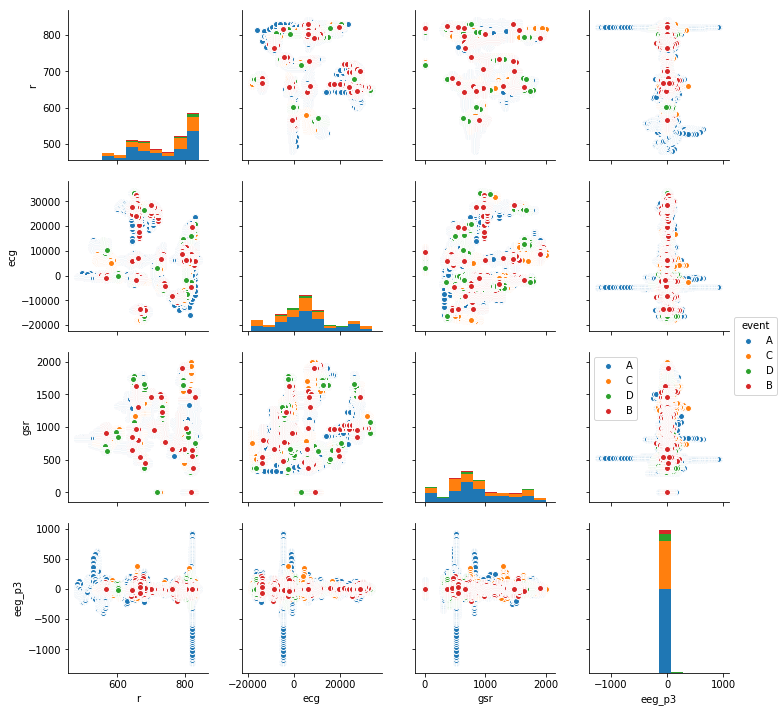

In [24]:
sns.pairplot(data[['r','ecg','gsr','experiment','eeg_p3','event']],hue='event')
plt.legend()
plt.show()

#### Observation
- we can make out some difference from the plots between ecg and eeg_p3 feature where the class A can be separated from other classes.
- Another plot from the features eeg_p3 and R(respiration) we can tell that the Class B are majorly in the middle of the plot and surrounded by other class points. It'll be interesting to see them when more than 2 features are considered.

In [ ]:
c1=[data['crew']==1]

In [7]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

## T-SNE Plot

In [3]:
dat=data.sample(n=10000,random_state=500)

In [4]:
dat[dat['event']=='A']=1
dat[dat['event']=='B']=2
dat[dat['event']=='C']=3
dat[dat['event']=='D']=4
dat['event'].value_counts()


1    5765
3    3452
4     495
2     288
Name: event, dtype: int64

In [7]:
import time

from sklearn.manifold import TSNE
time_start = time.time()
model = TSNE(n_components=2)
tsne_sam = model.fit_transform(dat)

In [9]:
label=dat['event'] 
tsne_data = np.vstack((tsne_sam.T,label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "event"))

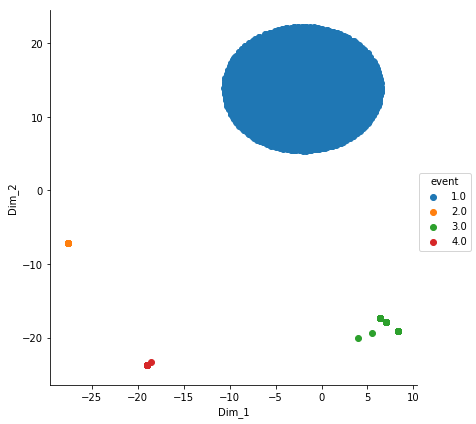

t-SNE done! Time elapsed: 737.1099164485931 seconds


In [11]:
sns.FacetGrid(tsne_df, hue="event", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

#### Observation:
- on considering all the features in multi dimenisonal space we get the best. However it is for only 10k which means there is almost more than 90% of data unseen in Multi dimensional space

## Conclusion:
- Key Features from EDA are EEG Recordings,respiration,ECG,Galvanic Skin Response which is Skin Response values
- The EEG features are "eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1", "eeg_p3", "eeg_pz","eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"
- From T-SNE we see that when all features are combined in multi Dimensional space they work good.


## Machine Learning Models

In [4]:
y=data['event']
y[y=='A']=1
y[y=='B']=2
y[y=='C']=3
y[y=='D']=4
y=np.array(list(y))
x=data.drop(['event'],axis=1)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7)

In [6]:

X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,train_size=0.7)

In [7]:
X_train=pd.get_dummies(X_train,'experiment')
X_test=pd.get_dummies(X_test,'experiment')
X_cv=pd.get_dummies(X_cv,'experiment')

### SGD-Log Loss

for alpha = 1e-06
Log Loss : 0.9236942640930881
for alpha = 1e-05
Log Loss : 0.9236942640930881
for alpha = 0.0001
Log Loss : 0.9200838520511652
for alpha = 0.001
Log Loss : 0.9220117238674348
for alpha = 0.01
Log Loss : 0.9160435843277959
for alpha = 0.1
Log Loss : 0.9176994787539946
for alpha = 1
Log Loss : 0.9156271314382922
for alpha = 10
Log Loss : 0.9182492104135983
for alpha = 100
Log Loss : 0.9202681607252451


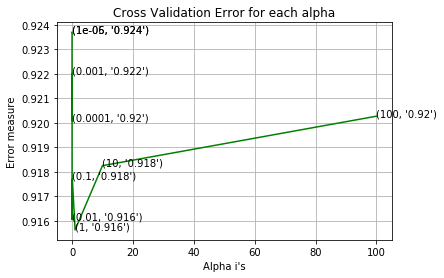

For values of best alpha =  1 The train log loss is: 0.9159844008888336
For values of best alpha =  1 The cross validation log loss is: 0.9156271314382922
For values of best alpha =  1 The test log loss is: 0.9157186597866498


In [8]:

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(Y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(Y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,Y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Logistic Regression

In [9]:
c=[0.01,0.1,1,10,100,1000]
for i in c:
    lr=LogisticRegression(C=i,class_weight='balanced',solver='lbfgs')
    lr.fit(X_train,Y_train)
    pred=lr.predict_proba(X_cv)
    print("the log loss value for c=",i)
    print(log_loss(Y_cv, pred))
    

the log loss value for c= 0.01
1.3707755781219322
the log loss value for c= 0.1
1.370678453660481
the log loss value for c= 1
1.367493720467114
the log loss value for c= 10
1.3697659362605246
the log loss value for c= 100
1.367877176904029
the log loss value for c= 1000
1.3664885834168081


In [11]:
lr=LogisticRegression(C=1000,class_weight='balanced',solver='lbfgs')
lr.fit(X_train,Y_train)
pred=lr.predict_proba(X_test)
print("the test log loss value is",i)
print(log_loss(Y_test, pred))

the test log loss value is 1000
1.3667618029734534


### Decision tree

In [12]:
d=[15,20,25,30,40,50,60,75]
loss=[]
from sklearn import tree
for i in d:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    pred=sig_clf.predict_proba(X_cv)
    loss.append(log_loss(Y_cv,pred))

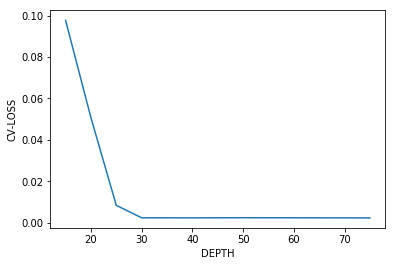

In [13]:
plt.plot(d,loss)
plt.xlabel("DEPTH")
plt.ylabel("CV-LOSS")
plt.show()

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=40)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, Y_train)
pred=sig_clf.predict_proba(X_test)
print("Log loss is",log_loss(Y_test,pred))

Log loss is 0.0022625662194530965


#### Taking test data for predictions

In [7]:
test=pd.read_csv('test.csv')

In [9]:
test.head(5)

,id,crew,experiment,time,seat,eeg_fp1,eeg_f7,eeg_f8,eeg_t4,eeg_t6,...,eeg_f4,eeg_c4,eeg_p4,eeg_poz,eeg_c3,eeg_cz,eeg_o2,ecg,r,gsr
0,0,1,LOFT,0.000000,0,17.899500,6.127830,0.994807,-28.206200,-47.695499,...,-7.044480,-14.405100,-4.03384,-0.393799,31.83810,17.075600,-8.137350,-7323.120117,643.177002,594.778992
1,1,1,LOFT,0.000000,1,45.883202,94.749001,23.290800,1.392000,2.060940,...,19.887501,-215.179001,2.11832,7.340940,9.66785,1169.239990,-0.024414,-3335.080078,826.724976,136.235001
2,2,1,LOFT,0.003906,0,33.120098,28.356501,-7.239220,-7.690860,-25.833799,...,-7.642560,-10.363600,10.95050,6.513360,36.01860,24.356600,0.956158,-7323.120117,643.177002,594.778992
3,3,1,LOFT,0.003906,1,43.280102,95.887001,18.702299,-1.432890,-4.232600,...,13.826600,-214.223007,-4.91354,3.504520,3.87811,1159.400024,-0.047607,-3335.080078,826.724976,136.235001
4,4,1,LOFT,0.007812,0,7.929110,3.460380,-10.860800,-26.366699,-25.894699,...,2.045450,-20.788799,-3.61418,-7.539830,3.08397,13.647900,1.473720,-7323.120117,643.177002,594.778992


In [10]:
t=test.drop(['experiment'],axis=1)

In [11]:
t.shape

(17965143, 27)

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=30)
clf.fit(x,y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x,y)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
            cv=3, method='sigmoid')

In [14]:
ids=test['id']

In [15]:
ids=test['id']
t=t.drop(['id'],axis=1)
pred=sig_clf.predict_proba(t)
pred=pd.DataFrame(pred)
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]

In [34]:
pred=sig_clf.predict_proba(t)
pred=pd.DataFrame(pred)

In [41]:
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]

In [42]:
out.to_csv(index=False)

### Random Forest

In [17]:
para={'n_estimators':[10,20,50],'max_depth':[3,5,8,10,15]}

In [ ]:
rf= RandomForestClassifier()
rcv=RandomizedSearchCV(rf,para)
rcv.fit(X_train,Y_train)
clf=rcv.best_estimator_

In [13]:
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x,y)
pred=sig_clf.predict_proba(X_cv)
log_loss(Y_cv,pred)

0.16422826668096743

In [15]:
pred=sig_clf.predict_proba(X_test)
log_loss(Y_test,pred)

0.16501376717504568

### Decision trees using Other features

In [53]:
data=pd.read_csv('train.csv')
y=data['event']
y[y=='A']=1
y[y=='B']=2
y[y=='C']=3
y[y=='D']=4
y=np.array(list(y))
x=data.drop(['event'],axis=1)

In [47]:
x['eeg_f7_eeg_f8']=x["eeg_f7"]-x["eeg_f8"]
x['eeg_t6_eeg_t5']=x["eeg_t6"]-x["eeg_t5"]
x['eeg_t4_eeg_t3']=x["eeg_t4"]-x["eeg_t3"]

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,train_size=0.7)

In [54]:
dic1 = {'CA':0,'DA':1,'SS':2,'LOFT':3}
X_train['experiment'] = X_train['experiment'].apply(lambda a: dic1[a])
X_train['experiment'] = X_train['experiment'].astype('int8')
X_test['experiment'] = X_test['experiment'].apply(lambda a: dic1[a])
X_test['experiment'] = X_test['experiment'].astype('int8')
X_cv['experiment'] = X_cv['experiment'].apply(lambda a: dic1[a])
X_cv['experiment'] = X_cv['experiment'].astype('int8')

In [6]:
from sklearn import tree
for i in range(25,60,5):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    pred=sig_clf.predict_proba(X_test)
    print(i)
    print(log_loss(Y_test,pred))

25
0.007815727984248932
30
0.0017040935267860794
35
0.0016140271963613912
40
0.0015932016379695286
45
0.001593288755235217
50
0.0015522845423128558
55
0.0015752072352521655


In [10]:
print(log_loss(Y_test,sig_clf.predict_proba(X_test)))

0.0022181661565980715


In [12]:
test=pd.read_csv('test.csv')

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=35)
    #clf.fit(X_train,Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train,Y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
            cv=3, method='sigmoid')

In [8]:
log_loss(Y_cv,sig_clf.predict_proba(X_cv))

0.0023802378408401322

In [9]:
log_loss(Y_test,sig_clf.predict_proba(X_test))

0.0023748957470766862

In [11]:
sig_clf.fit(x,y)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
            cv=3, method='sigmoid')

In [14]:
t=test
t['experiment'] = t['experiment'].apply(lambda a: dic1[a])
t['experiment'] = t['experiment'].astype('int8')
ids=test['id']
t=t.drop(['id'],axis=1)
pred=sig_clf.predict_proba(t)
pred=pd.DataFrame(pred)
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]

In [15]:
out.to_csv('out0.csv',index=False)

#### RF with other feat

In [25]:
rf= RandomForestClassifier(n_estimators=50,max_depth=10)
sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
sig_clf.fit(X_train,Y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
            cv=3, method='sigmoid')

In [ ]:
test=pd.read_csv('test.csv')
t=test
t['experiment'] = t['experiment'].apply(lambda a: dic1[a])
t['experiment'] = t['experiment'].astype('int8')
ids=test['id']
t=t.drop(['id'],axis=1)
pred=model.predict_proba(t)
pred=pd.DataFrame(pred)
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]
out.to_csv('out_rf.csv',index=False)

### MLP

In [21]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


y=pd.get_dummies(y)

# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()


Using TensorFlow backend.


In [25]:
# some model parameters
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7)
output_dim = 4
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 15


In [26]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer()
X_train=transformer.fit_transform(X_train)
X_test=transformer.transform(X_test)


In [30]:
model = Sequential()

model.add(Dense(56, activation='relu', input_shape=(input_dim,)))

model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(28, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 56)                1512      
_________________________________________________________________
dense_10 (Dense)             (None, 28)                1596      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 28)                812       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28)                112       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 116       
Total params: 4,148
Trainable params: 4,092
Non-trainable params: 56
_________________________________________________________________
Train o

Test score: 0.6362318473344495
Test accuracy: 0.7568412308497241


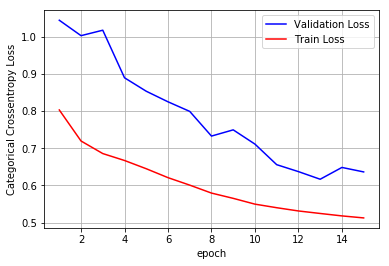

In [31]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.show()

In [32]:
p=model.predict_proba(X_test)
p.shape

(1460227, 4)

In [16]:
test=pd.read_csv('test.csv')
t=test
t['experiment'] = t['experiment'].apply(lambda a: dic1[a])
t['experiment'] = t['experiment'].astype('int8')
ids=test['id']
t=t.drop(['id'],axis=1)
pred=model.predict_proba(t)
pred=pd.DataFrame(pred)
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]
out.to_csv('out_mlp.csv',index=False)

### LGBM

In [3]:
import lightgbm as lgbm

In [4]:
y=data['event']
y[y=='A']=0
y[y=='B']=1
y[y=='C']=2
y[y=='D']=3
y=np.array(list(y))
x=data.drop(['event'],axis=1)
dic1 = {'CA':0,'DA':1,'SS':2,'LOFT':3}
x['experiment'] = x['experiment'].apply(lambda a: dic1[a])
x['experiment'] = x['experiment'].astype('int8')

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7)

In [6]:
params = {'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':4,
    'metric': 'multi_logloss',
    'learning_rate': 0.005,
    'max_depth': 7,
    'num_leaves': 17,
    'feature_fraction': 0.4,
    'bagging_fraction': 0.6,
    'bagging_freq': 17}

d_train = lgbm.Dataset(X_train, label=Y_train)
clf = lgbm.train(params, d_train, 100)

In [7]:
predictions=clf.predict(X_test)
log_loss(Y_test,predictions)

0.697778447575102

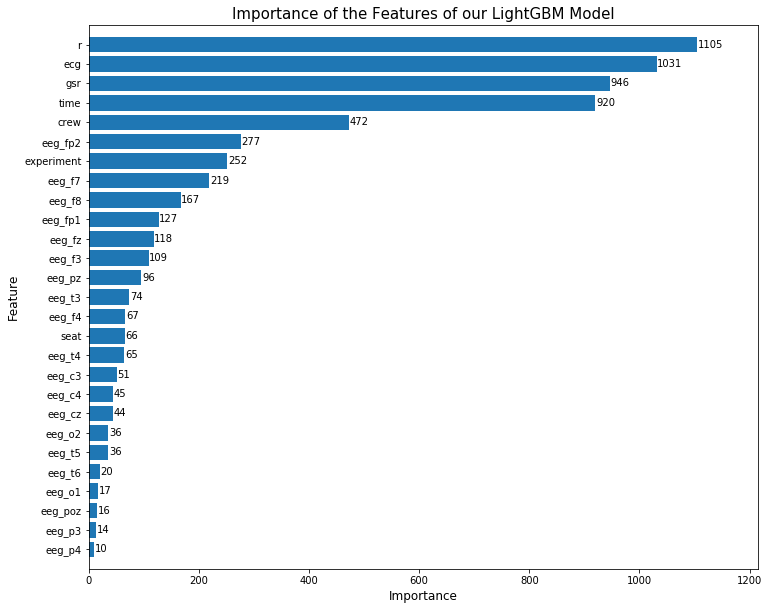

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
lgbm.plot_importance(clf, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features of our LightGBM Model", fontsize=15)
plt.show()

In [6]:
dtrain=lgbm.Dataset(x,label=y)
clf=lgbm.train(params,dtrain,100)

In [7]:
test=pd.read_csv('test.csv')
t=test
t['experiment'] = t['experiment'].apply(lambda a: dic1[a])
t['experiment'] = t['experiment'].astype('int8')
ids=test['id']
t=t.drop(['id'],axis=1)
pred=clf.predict(t)
pred=pd.DataFrame(pred)
pred['id']=ids
pred.columns=['A','B','C','D','id']
out=pred[['id','A','B','C','D']]
out.to_csv('out_lgbm.csv',index=False)

### LR SVM

In [37]:
a=[0.00001,0.0001,0.001,0.01,0.1,1]
for i in a:
    clf = SGDClassifier(alpha=i)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    pred=sig_clf.predict_proba(X_cv)
    print(log_loss(Y_cv,pred))

0.9081462459994611
0.918853424918333
0.9127202850133157
0.8748668403838721
0.8914776707257844
0.9175992977018457


### RF

In [18]:
#param={'n_estimators':[5,10,15],'max_depth':[2,4,6,8,10]}
rf= RandomForestClassifier(n_estimators=15,max_depth=8)
#rcv=RandomizedSearchCV(rf,param)
sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
sig_clf.fit(X_train, Y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
            cv=3, method='sigmoid')

In [ ]:
log_loss(Y_cv,sig_clf.predict_proba(X_cv))
log_loss(Y_test,sig_clf.predict_proba(X_test))

0.9164678986663335
0.9172102277129358


### Performance

In [4]:
from ipywidgets import *
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model","LOSS"]

x.add_row(["SGD-Log Loss",0.917])
x.add_row(["DT",0.27])
x.add_row(["MLP",0.77])
x.add_row(['Logistic Regrer.',1.7])
x.add_row(["LGBM",0.68])
x.add_row(["LR SVM",0.98])
x.add_row(["RF",1.9])
x.add_row(["DT-Other Feat.",1.7])
print(x)

+------------------+-------+
|      Model       |  LOSS |
+------------------+-------+
|   SGD-Log Loss   | 0.917 |
|        DT        |  0.27 |
|       MLP        |  0.77 |
| Logistic Regrer. |  1.7  |
|       LGBM       |  0.68 |
|      LR SVM      |  0.98 |
|        RF        |  1.9  |
|  DT-Other Feat.  |  1.7  |
+------------------+-------+
